<a href="https://colab.research.google.com/github/mansibhat/visualization-using-Python/blob/main/Scatterplot_Movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from vega_datasets import data

In [ ]:
#Scatterplot: x,y,size,hue,style, alpha (0-1) for transperancy, markers='*' with edgecolor='black'
df= data.movies()


In [ ]:
df


,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,Zack and Miri Make a Porno,31452765.0,36851125.0,21240321.0,24000000.0,Oct 31 2008,R,101.0,Weinstein Co.,Original Screenplay,Comedy,Contemporary Fiction,Kevin Smith,65.0,7.0,55687.0
3197,Zodiac,33080084.0,83080084.0,20983030.0,85000000.0,Mar 02 2007,R,157.0,Paramount Pictures,Based on Book/Short Story,Thriller/Suspense,Dramatization,David Fincher,89.0,NaN,NaN
3198,Zoom,11989328.0,12506188.0,6679409.0,35000000.0,Aug 11 2006,PG,NaN,Sony Pictures,Based on Comic/Graphic Novel,Adventure,Super Hero,Peter Hewitt,3.0,3.4,7424.0
3199,The Legend of Zorro,45575336.0,141475336.0,NaN,80000000.0,Oct 28 2005,PG,129.0,Sony Pictures,Remake,Adventure,Historical Fiction,Martin Campbell,26.0,5.7,21161.0


In [ ]:
df.dtypes

Title                      object
US_Gross                  float64
Worldwide_Gross           float64
US_DVD_Sales              float64
Production_Budget         float64
Release_Date               object
MPAA_Rating                object
Running_Time_min          float64
Distributor                object
Source                     object
Major_Genre                object
Creative_Type              object
Director                   object
Rotten_Tomatoes_Rating    float64
IMDB_Rating               float64
IMDB_Votes                float64
dtype: object

In [ ]:
df.Major_Genre.unique()

array([None, 'Drama', 'Comedy', 'Musical', 'Thriller/Suspense',
       'Adventure', 'Action', 'Romantic Comedy', 'Horror', 'Western',
       'Documentary', 'Black Comedy', 'Concert/Performance'], dtype=object)

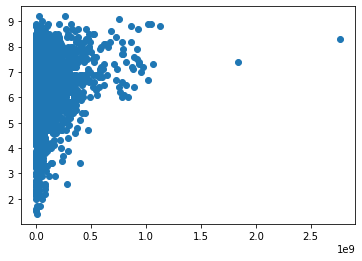

In [ ]:
#matplotlib
plt.scatter(df.Worldwide_Gross, df.IMDB_Rating)

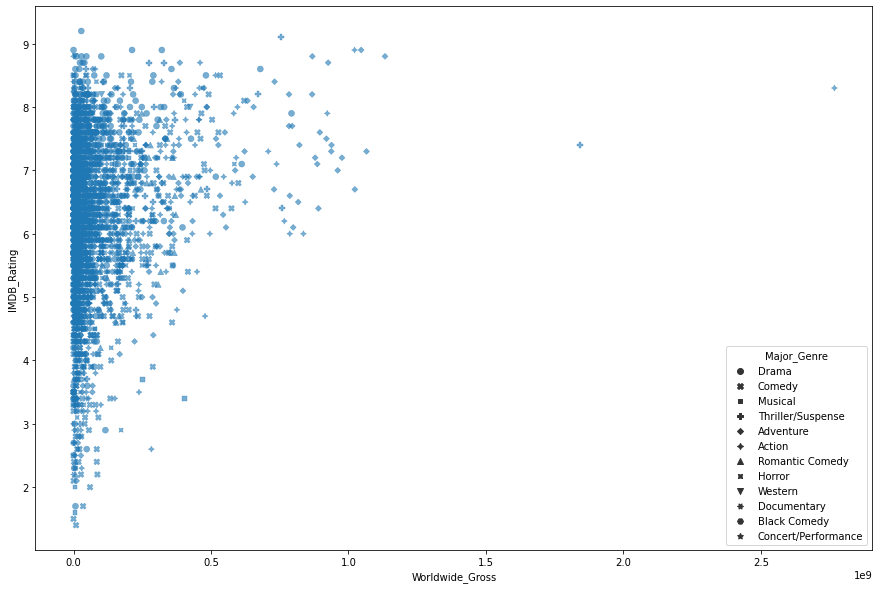

In [ ]:
#Seaborn
plt.figure(figsize=(15,10))
sns.scatterplot(x='Worldwide_Gross', y='IMDB_Rating',data=df,style='Major_Genre',alpha=0.6,marker='x')

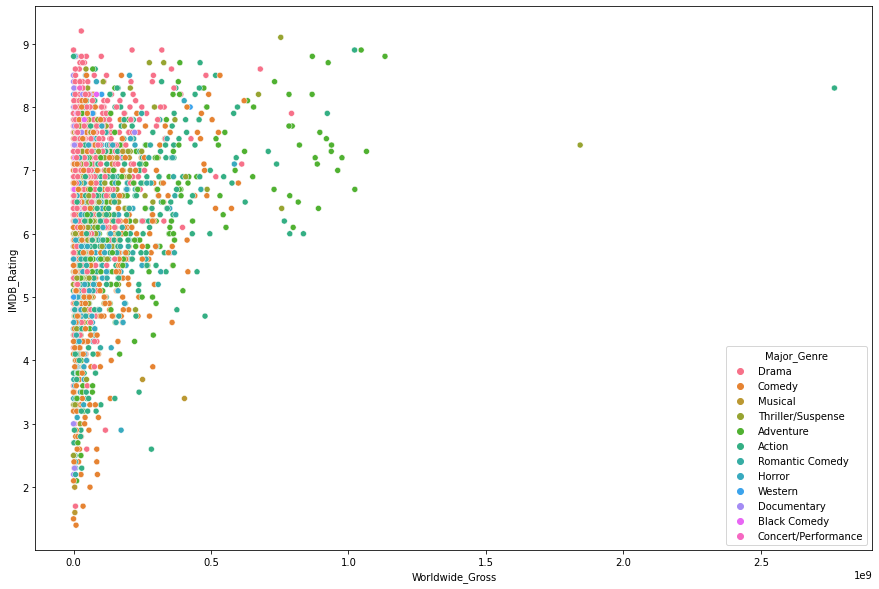

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Worldwide_Gross', y='IMDB_Rating',hue='Major_Genre',data=df)

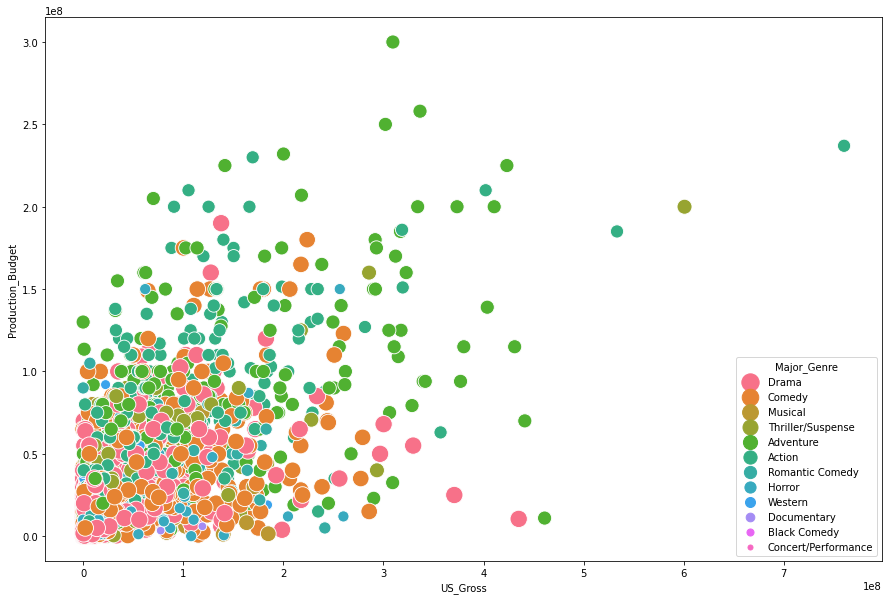

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='US_Gross',y='Production_Budget',data=df, hue='Major_Genre',size='Major_Genre',sizes=(25,300))

# **Convert date to year and Months**

In [ ]:
df.Release_Date
df['year']=pd.DatetimeIndex(df['Release_Date']).year
df['month']=pd.DatetimeIndex(df['Release_Date']).month


In [ ]:
df[df.isna()]

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes,year,month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Worldwide_Gross_Log']=np.log(df.Worldwide_Gross)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df.head()

,Title,US_Gross,Worldwide_Gross,US_DVD_Sales,Production_Budget,Release_Date,MPAA_Rating,Running_Time_min,Distributor,Source,Major_Genre,Creative_Type,Director,Rotten_Tomatoes_Rating,IMDB_Rating,IMDB_Votes,year,month,Worldwide_Gross_Log
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,Jun 12 1998,R,NaN,Gramercy,None,None,None,None,NaN,6.1,1071.0,1998,6,11.891930
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,Aug 07 1998,R,NaN,Strand,None,Drama,None,None,NaN,6.9,207.0,1998,8,9.294314
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,Aug 28 1998,None,NaN,Lionsgate,None,Comedy,None,None,NaN,6.8,865.0,1998,8,12.221621
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,Sep 11 1998,None,NaN,Fine Line,None,Comedy,None,None,13.0,NaN,NaN,1998,9,12.830981
4,Slam,1009819.0,1087521.0,NaN,1000000.0,Oct 09 1998,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,None,62.0,3.4,165.0,1998,10,13.899411


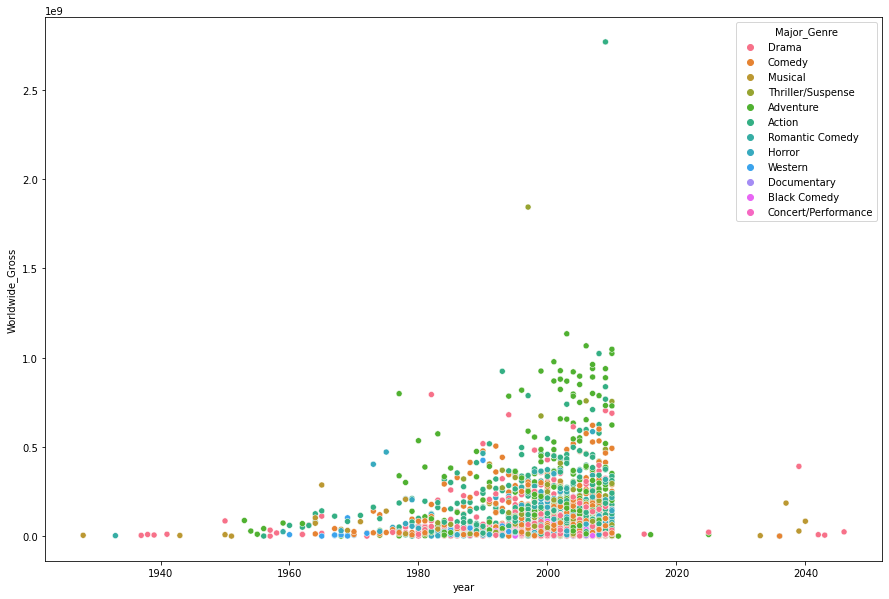

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='year', y='Worldwide_Gross',hue='Major_Genre',data=df)

In [ ]:
df=df[df.year<=2019]
df=df[df.year>=2000]

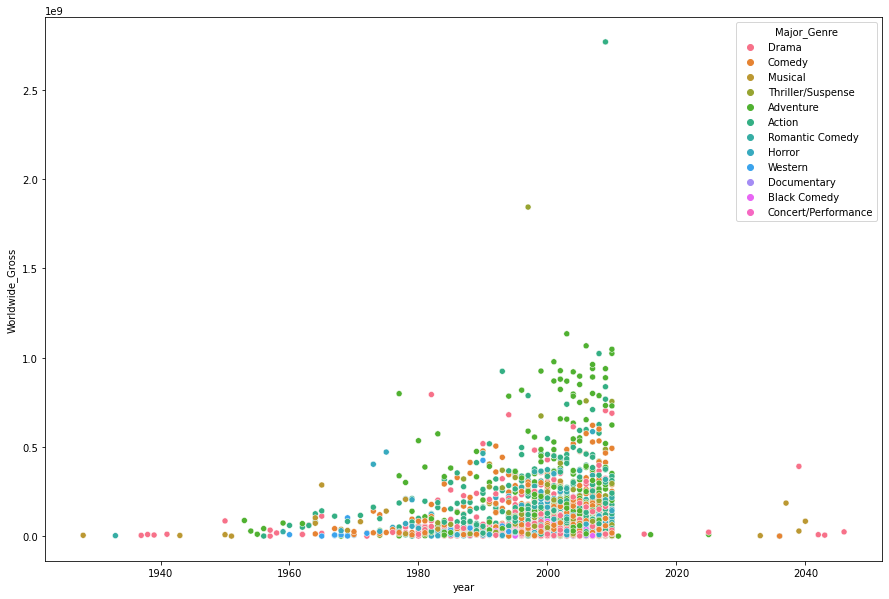

In [57]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='year',y='Worldwide_Gross',hue='Major_Genre',data=df)

In [ ]:
df['Worldwide_Gross_Avg']=np.mean(df.Worldwide_Gross)
plt.figure(figsize=(15,10))
sns.histplot (x='year',y='Worldwide_Gross_Avg',data=df)

In [ ]:
#read file from localdrive
file="/content/Movie_data.xlsx"
df1=pd.read_excel(file)
#filter
df1=df1[df1.Year<=2010]
df1.head(2)

,Year,Major_Genre,Avg_Worldwide_Gross
0,2000,Action,1.158212e+08
1,2000,Adventure,1.223192e+08


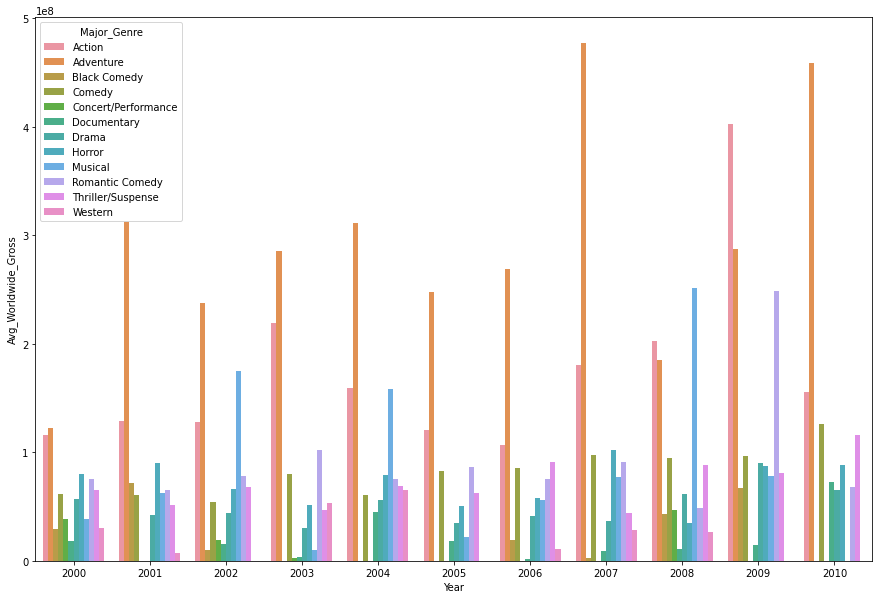

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot (x='Year',y='Avg_Worldwide_Gross',hue='Major_Genre' ,data=df1)

In [ ]:
#drop row
#df.drop(df.index[2])
#drop column
#df.drop('reports', axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


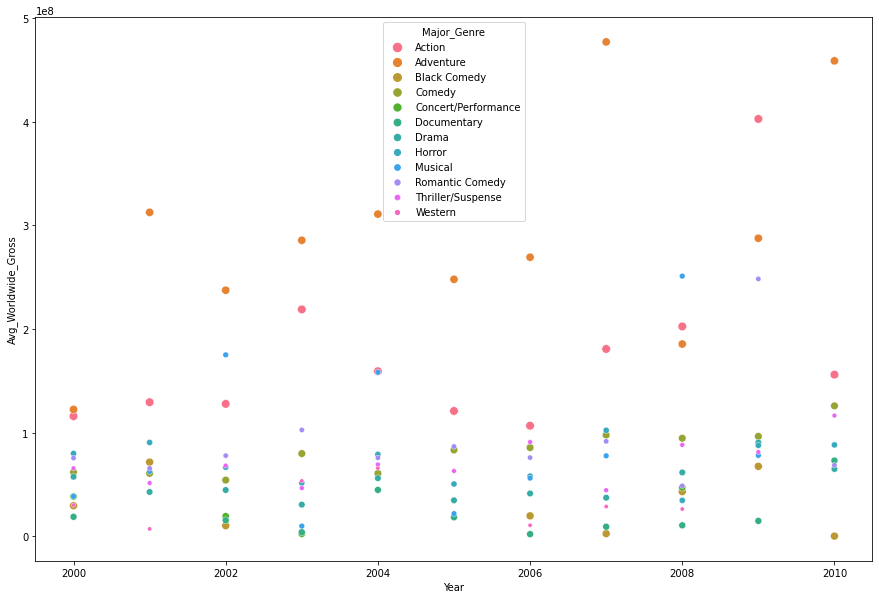

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot('Year','Avg_Worldwide_Gross',data=df1,hue='Major_Genre', size='Major_Genre')

In [65]:
df3= df[["year", "Major_Genre", "Worldwide_Gross"]]
df3=df3[df3.year>=2000]


In [68]:
df3=df3[df3.year<=2019]

In [69]:
df3

,year,Major_Genre,Worldwide_Gross
23,2007,Thriller/Suspense,18435.0
29,2008,Action,22139590.0
32,2005,Drama,172569.0
37,2006,None,84689.0
40,2008,Adventure,132999811.0
...,...,...,...
3195,2009,Comedy,98690286.0
3196,2008,Comedy,36851125.0
3197,2007,Thriller/Suspense,83080084.0
3198,2006,Adventure,12506188.0


In [80]:
#PivotTable
movies_pivot=df3.pivot_table(index="Major_Genre",columns="year")
movies_pivot

Worldwide_Gross                ...                            
year                           2000          2001  ...          2009          2010
Major_Genre                                        ...                            
Action                 1.158212e+08  1.293130e+08  ...  4.028273e+08  1.559118e+08
Adventure              1.223192e+08  3.126037e+08  ...  2.876337e+08  4.589260e+08
Black Comedy           2.936265e+07  7.143088e+07  ...  6.734822e+07  2.098700e+04
Comedy                 6.174496e+07  6.056791e+07  ...  9.631415e+07  1.257755e+08
Concert/Performance    3.823634e+07           NaN  ...           NaN           NaN
Documentary            1.864232e+07           NaN  ...  1.467823e+07  7.296595e+07
Drama                  5.732708e+07  4.262403e+07  ...  9.037465e+07  6.481790e+07
Horror                 7.979102e+07  9.041858e+07  ...  8.765408e+07  8.805915e+07
Musical                3.838945e+07  6.237682e+07  ...  7.795696e+07           NaN
Romantic Comedy        7.537588e+07  6.539026e+07  ...  2.483627e+08  6.841832e+07
Thriller/Suspense      6.546653e+07  5.126617e+07  ...  8.112592e+07  1.164016e+08
Western                2.997738e+07  6.944180e+06  ...           NaN           NaN

[12 rows x 11 columns]